So begins my attempt to understand jupyter notebooks, TESS, and lightcurves. <br> TESS = Transiting Exoplanet Survey Satellite

In [2]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\diarm\miniconda3\envs\TESSProject\Lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


TCurrent state: I have the notebook and environment set up. I have also installed lightkurve. Now I am on step 1 of the stuff I have to do. Here is the link: https://heasarc.gsfc.nasa.gov/docs/tess/tutorial_landing.html
 Step 1: https://heasarc.gsfc.nasa.gov/docs/tess/TESS-Intro.html

TESS observation is done in 96x24 degree sectors. <br>TESS data products are: <br> Full Frame Images (FFI). These are full images of a sector, how often they are taken is called the "cadence". <br><br>Target Pixel File (TPF): sections cut out from a FFI focusing on a specific target. These have a cadence of 2 minutes of 20 seconds. These are points of interest that can have a lower cadence because they are smaller. The mission can't have a high cadence for everything because there isnt enough bandwidth, storage, processing capacity to do that (and it wouldnt be very useful). So instead it focuses in on specific points. <br><br>Light Curve Files (LCF): These are time series data measuring flux over time from a TPF. Flux is the amount of light coming from the TPF. So you look at the amount of light coming from a star and if it goes down that could mean something moving in front of it. That could be a planet transiting the star... a TRANSITING EXOPLANET<br><br>Having a shorter cadence lets us know more about a planet. a planet can take several hours to transit its star so we can detect it with a lower cadence. But with a high cadence we can also see the "ingress" and "egress" which is when its moving onto and off the stellar disk.

Now, to see how lightkurve works, we examine a star. The tutorial suggests the romantically named L98-59.<br><br>We use search_ffi to find the FFIs that this object is in. Each row inthe table is a new FFI. Exptime is exposure time in seconds. Distance is the distance from a target of interest, you can specify a distance of interest and then search around it.

In [3]:
#search functions to get FFI, TPF, LCF
search_ffi = lk.search_tesscut('L 98-59')
search_tpf = lk.search_targetpixelfile('L 98-59')
search_lcf = lk.search_lightcurve('L 98-59')

In [4]:
#search_ffi

In [5]:
#search_tpf

In [6]:
#search_lcf

Now we can refine the search to only include those from a specific author and with an exposure of 120 seconds (2 minute cadence)

In [7]:
search_lcf_refined = lk.search_lightcurve('L 98-59', author="SPOC", exptime=120)
#search_lcf_refined

Now we can download a collection of all the lightcurves in that search. So what we have here is all the different light curves of the object. The sector of each one of these is different, because its referring to a sector of time. A sector is a period of time spent looking at a specific sky tile. This specific star is in lots of sectors.

In [8]:
lcf = search_lcf_refined.download_all()
#lcf

The flux within the light curves is given by flux, sap_flux, and pdcsap_flux. The default is that flux=pdcsap_flux.<br><br>Important here, what is an aperture? An aperture is a kind of mask that you use to try to isolate the light from a specific star, so you can capture most of the stars light while minimising light from the background and other stars. <br><br>SAP - simple aperture photometry. This is just the data from the aperture. It's the raw data, but its influenced by factors like the spacecraft jitter, thermal variations, scattered light from the sun, moon, earth, and certain electronics factors (don't need to understand all this just know its there)<br><br>PDCSAP - Pre-search Data Conditioning SAP. This is basically the cleaned data. Its cleaned using CBVs, which are vectors that allow us to filter out patterns that are common and <i>usually</i> caused by the factors we discussed above. These CBVs are made by comparing huge amounts of difference images to find common trends. We can then remove those.<br><br>Each row of the data below corresponds to one cadence. It's the data from one time period.

In [9]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1354.1074113410245,2.4635420e+04,1.8856627e+01,-8.0586493e-04,91190,664.04462,338.97644,2.3127123e+04,1.7658133e+01,1.8465968e+03,5.2003989e+00,2.4635420e+04,1.8856627e+01,0,———,———,———,———,664.04462,6.2346959e-04,338.97644,6.9568102e-04,3.1294446e-02,1.5483069e-01
1354.1088002024744,2.4656008e+04,1.8861403e+01,-8.0589182e-04,91191,664.05609,338.96900,2.3150639e+04,1.7662607e+01,1.8428802e+03,5.1911125e+00,2.4656008e+04,1.8861403e+01,0,———,———,———,———,664.05609,6.2315754e-04,338.96900,6.9629494e-04,4.3172963e-02,1.4587776e-01
1354.110189063866,2.4635619e+04,1.8864876e+01,-8.0591877e-04,91192,664.07351,338.95814,2.3137189e+04,1.7665859e+01,1.8525369e+03,5.2004828e+00,2.4635619e+04,1.8864876e+01,0,———,———,———,———,664.07351,6.2400498e-04,338.95814,6.9669099e-04,6.0803384e-02,1.3428329e-01
1354.1129667867635,2.4621027e+04,1.8853863e+01,-8.0597255e-04,91194,664.05132,338.94885,2.3098303e+04,1.7655546e+01,1.8542960e+03,5.2071209e+00,2.4621027e+04,1.8853863e+01,0,———,———,———,———,664.05132,6.2639196e-04,338.94885,6.9927127e-04,3.7734102e-02,1.2694269e-01
1354.1143556482134,2.4617400e+04,1.8859161e+01,-8.0599944e-04,91195,664.09017,338.97538,2.3127893e+04,1.7660507e+01,1.8433275e+03,5.1999226e+00,2.4617400e+04,1.8859161e+01,0,———,———,———,———,664.09017,6.2417402e-04,338.97538,6.9604575e-04,7.8965843e-02,1.5301819e-01
1354.1157445097215,2.4630531e+04,1.8860582e+01,-8.0602628e-04,91196,664.08357,338.96449,2.3136076e+04,1.7661839e+01,1.8441443e+03,5.1992383e+00,2.4630531e+04,1.8860582e+01,0,———,———,———,———,664.08357,6.2411965e-04,338.96449,6.9649977e-04,7.2042428e-02,1.4030553e-01
1354.117133371171,2.4625502e+04,1.8855038e+01,-8.0605317e-04,91197,664.08138,338.96244,2.3130492e+04,1.7656647e+01,1.8393002e+03,5.1891294e+00,2.4625502e+04,1.8855038e+01,0,———,———,———,———,664.08138,6.2480610e-04,338.96244,6.9642899e-04,6.8586096e-02,1.3917884e-01
1354.118522232678,2.4619252e+04,1.8856379e+01,-8.0608000e-04,91198,664.07300,338.95776,2.3123014e+04,1.7657902e+01,1.8428878e+03,5.1969514e+00,2.4619252e+04,1.8856379e+01,0,———,———,———,———,664.07300,6.2365801e-04,338.95776,6.9719343e-04,6.0448773e-02,1.3230386e-01


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized pdcsap_flux'>

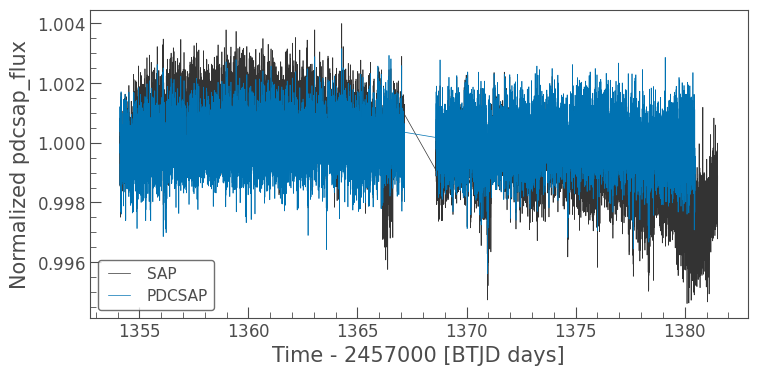

In [11]:
pdcsap = lcf[0].pdcsap_flux #the cleaned data
sapflux = lcf[0].sap_flux # the uncleaned data

ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP")
lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP")

That big old gap in the middle just means there isnt any data available at that time. maybe because the data is being downlinked. Doesnt really matter. Now we can use flatten to remove slow trends. These are differences in the flux which are slower than the specific window length. The window length is how many cadences we use to make our baseline and then use a sav-gol filter. 401 is widely used, corresponding to roughly 13.4 hours.

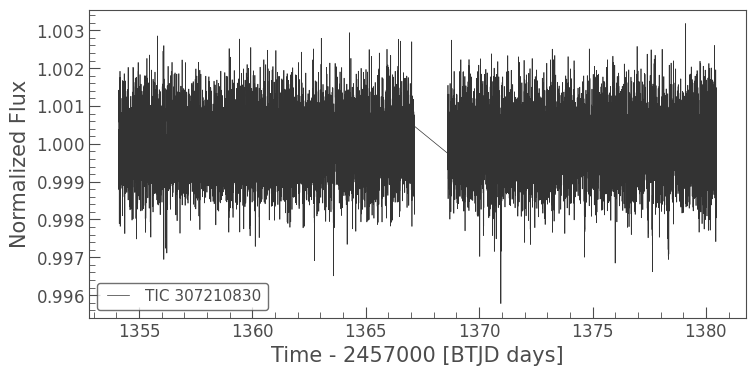

In [12]:
flat_lc = lcf[0].flatten(window_length=401)
flat_lc.plot();

The fold() function takes the data and changes it into modulo period (how long the planet takes to orbit its star). It stacks them all up over time, so you can see where the transit is happening more easily. You can see that big dip near the start? That's the transit.

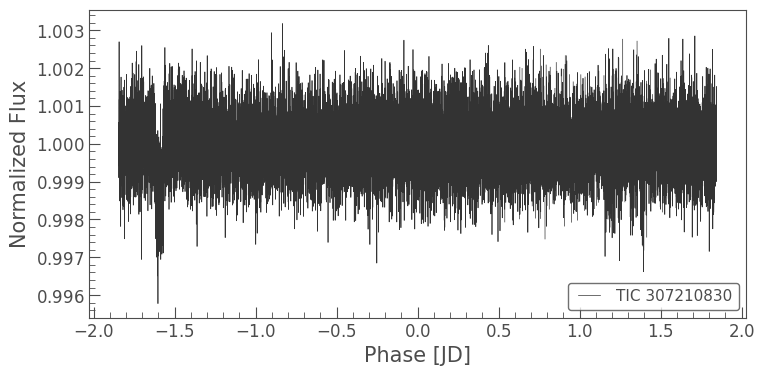

In [13]:
folded_lc = flat_lc.fold(period=3.690621)
folded_lc.plot();

You can use the bin() function to get the mean value in each bin. Bin size is given in days. This lets us very easy see where the transit happens.

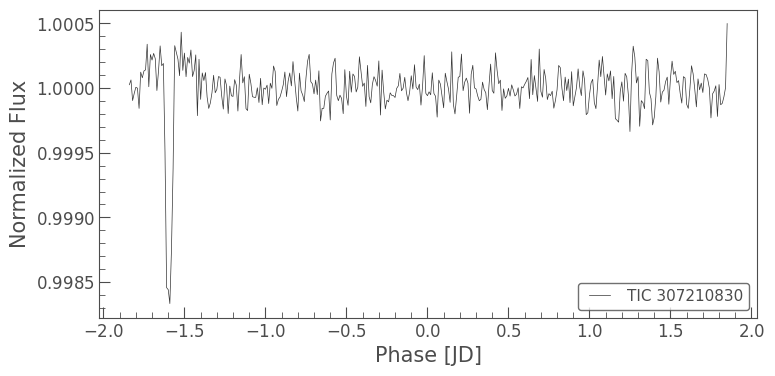

In [14]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot();